# Travel Time for Seismic Waves
## Lecture 16

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize

# Review solving ODE numerically

Consider the intial value problem of solving the following ordinary differential equation:

\begin{align}
\frac{dy}{dt} = f(y), \quad y(0) = y_0
\end{align}

In such problems, $y(t)$ is an unknown function that needs to be determined.  The right hand side of the differential equation, $f(y)$, represents a known function of $y$ that needs to be given explicitly.

We have seen a number of methods (Euler, Midpoint, RK4) that can be used to numerically solve such problems.  

## Example: Projectile Motion

At its simplest, projectile motion involves solving

$$
\begin{align}
\frac{d^2 x}{dt^2} &= 0 \\
\frac{d^2 y}{dt^2} &= -g
\end{align}
$$

given the initial conditions for $x(0)$, $y(0)$, and the initial velocities.

We have learned that to solve such problems we can rewrite the equations as a system of four first order differential equations:

$$
\begin{align}
\frac{d x}{dt} &= v_x \\
\frac{d y}{dt} &= v_y \\
\frac{d v_x}{dt} &= 0 \\
\frac{d v_y}{dt} &= -g \\ \,
\end{align}
$$

given the initial conditions $x(0) = x_0$, $y(0) = y_0$, $v_x(0) = v_{x0}$, $v_y(0) = v_{y0}$

### Midpoint scheme (review)

1\. Estimate slope $s_1$ at $t$

$$ s_1 = f(y(t), t) $$

2\. Use $s_1$ to estimate the midpoint between $t$ and $t + \Delta t$

\begin{align}
y^* &= y ( t + \Delta t/2) \\
       &= y(t) + \frac{\Delta t}{2} s_1
\end{align}
 	

3\. Use $y^*$ to get the the slope $s_2$ at the midpoint

$$ s_2 = f( y^*, t +  \frac{\Delta t}{2} ) $$

4\. Use $s_2$ to estimate $y(t + \Delta t)$

$$ y(t + \Delta t) = y(t) + \Delta t s_2 $$

### Midpoint scheme algorithm

\begin{align}
s_1 &= f(y_i, t_i) \\
y^* &= y_i + \Delta t / 2 s_1 \\
s_2 &= f(y^*, t_i + \Delta t /2) \\
y_{i+1} &= y_i + \Delta t s_2
\end{align}

### Vector formulation

Going back to the general form of an ODE we can also think about the unknown function as being a *vector-valued function* such as

\begin{align}
\frac{d \vec{q} }{dt} = \vec{F}( \vec{q} ), \quad \vec{q}(0) = \vec{q}_0 
\end{align}

where $ \vec{q}(t) = \left( q_1(t), q_2(t), \ldots, q_m(t) \right)$ is a vector in which every component is a function. 


We can define a vector for the projectile motion problem like this

$$
\vec{q}(t) = \left( x(t), y(t), v_x(t), v_y(t) \right)
$$

This vector represents the **state** of the projectile motion system. Likewise, we can write down 

\begin{align}
\vec{F}( \vec{q} ) &= \vec{F}(x, y, v_x, v_y) = (v_x, v_y, 0, -g) \\
\vec{q}_0 &= \left( x_0, y_0, v_{x0}, v_{y0} \right) \\
\end{align}

This is just a compact rewriting of our system of four first-order DEs in a vector formulation.

This allows us to generalize our midpoint scheme as follows:

In [3]:
def MidpointStepper(F, q0, t):  
    """
    Solve the ODE dq/dt = F(q, t) with q(0) = q0
    
    where F is a vector valued function
          q0 is a vector of initial conditions
          t is time array variable
    """

    ### Initialize the state and time
    q = np.array(q0)
    dt = t[1] - t[0]
        
    # count number points of time to solve
    N = len(t)
    
    # Calculate the solution using the Midpoint Method:
    for i in range(N):
        
        # send the results back
        yield list(q)

        # Estimate slope s1 at  t
        s1 = F( q, t[i] )
        s1 = np.asarray(s1) # ensure s1 is a numpy array
        
        # Use s1 to estimate the midpoint between t and t+Δt
        q_tmp = q + s1*dt/2
        
        # Estimate the slope s2 at the midpoint
        s2 = F( q_tmp, t[i]+ dt/2 )
        s2 = np.asarray(s2) # ensure s2 is a numpy array
        
        # Use s2 to estimate y(t+Δt)
        q = q + s2*dt
        

Notice that our solver is now very general. The same code could be used for many different differential equations.  

We can formulate our specific projectile motion problem by defining a **particular** right-hand-side function.

In [4]:
g = 9.81
    
tmax = 2
dt = 0.01

# create an array for the time variables
t = np.arange(0, tmax, dt)

# define the right hand side, F(q)
def F( q, t ):
    # separate out the variables
    x, y, vx, vy = q
    # evaluate the right hand side of the ODE
    dqdt = [vx, vy, 0, -g ]
    
    return dqdt

# define initial values (x0, y0, vx0, vy0)
q0 = [0, 0, 3, 10]

Then all we need to do is pass in this specific function for F and the initial conditions `q0` into our general solver.

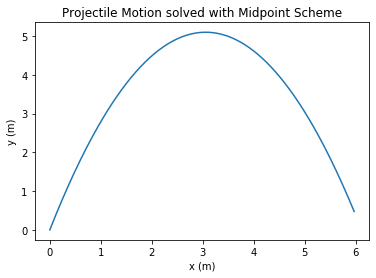

In [5]:
stepper = MidpointStepper(F, q0, t)
data = pd.DataFrame(stepper, columns=['x', 'y', 'vx', 'vy'])

plt.plot(data.x, data.y)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Projectile Motion solved with Midpoint Scheme')
plt.show()

This abstraction separating out the physical model from the numerical solver, also allows us to try new solvers with almost *no changes the code at all*.

The Python package `scipy` comes with its own ODE solver.  Here is the same projectile motion problem using a different solver.

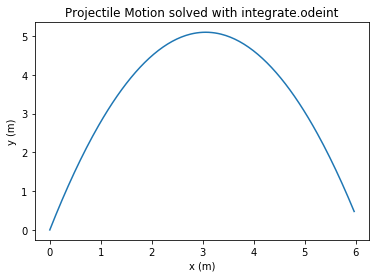

In [6]:
# we need to import the SciPy integrate module
from scipy import integrate

stepper = integrate.odeint(F, q0, t)
data = pd.DataFrame(stepper, columns=['x', 'y', 'vx', 'vy'])

plt.plot(data.x, data.y)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Projectile Motion solved with integrate.odeint')
plt.show()

# Aside: Introduction to Seismology

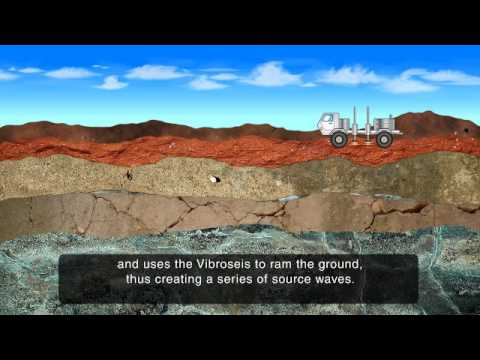

In [7]:
from IPython.display import YouTubeVideo

YouTubeVideo("22m27MhzSQs")

# Ray Tracing in Seismology

\begin{align}
\frac{dx}{dt} &= v \sin \theta \\
\frac{dy}{dt} &= -v \cos \theta \\
\frac{d\theta}{dt} &= - \cos \theta \frac{\partial v}{\partial x} - \sin \theta \frac{\partial v}{\partial y}  \\
\end{align}

where

$$ v = v(x, y) $$

is the velocity of a seismic waves that depends on the physical composition of the rock within the ground.

#### Forward problem
$ v(x,y)$ is assumed to be known and the goal is to determine the path of the rays.

#### Inverse problem
Measurements of the travel times of the rays are known and the goal is to estimate $v(x,y)$.



## Forward Problem

Let's start with a rock structure that is getting linearly denser with depth.

#### Birch's Law

$$ v = 0.33 \rho + 2.20 $$

were $v$ is in  km/s if  $\rho$ is in $10^3$ kg/m$^3$.

So,

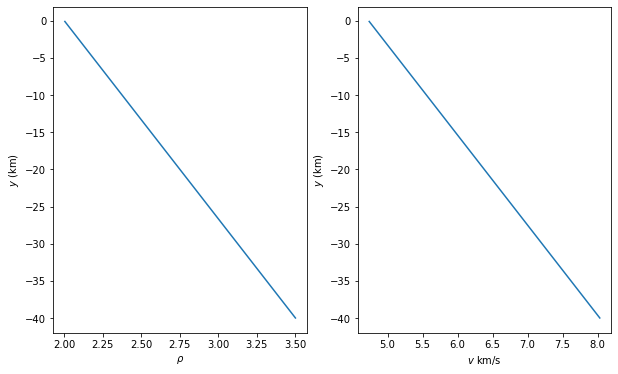

In [9]:
y = np.arange(-40, 0, 0.1)
x = np.arange(0, 120, 0.1)

def ρ(x, y):
    return (2000 - 1500/40*y)/1000 

def v(x, y):
    return 0.33 + 2.20*ρ(x, y)

fig, axs = plt.subplots(1,2, figsize=(10,6))

axs[0].plot(ρ(0, y), y)
axs[0].set_xlabel(r'$\rho$')
axs[0].set_ylabel(r'$y$ (km)')

axs[1].plot(v(0, y), y)
axs[1].set_xlabel(r'$v$ km/s')
axs[1].set_ylabel(r'$y$ (km)')
plt.show()

Let's send out a ray!

In [10]:
sin = np.sin
cos = np.cos
π = np.pi

tmax = 22
dt = 0.1

# create an array for the time variables
t = np.arange(0, tmax, dt)

# define the right hand side, F(q)
def F( q, t ):
    # separate out the variables
    x, y, θ = q
    
    # evaluate the right hand side of the ODE
    dxdt = v(x,y)*sin(θ)
    dydt = -v(x,y)*cos(θ)
    dθdt = -cos(θ)*dvdx(x, y) - sin(θ)*dvdy(x,y)
    dqdt = [dxdt, dydt, dθdt]
    
    return dqdt

# define initial values (x0, y0, θ0)
q0 = [0, 0, π/4]

We'll also need the derivatives of $v(x,y)$.  We can estimate those numerically

In [11]:
# Centered difference scheme 
def NDc(f, x0, dx):
    return (f(x0+dx) - f(x0-dx)) / (2*dx)

def dvdx(x, y):
    return NDc(lambda x: v(x,y), x, 1)

def dvdy(x, y):
    return NDc(lambda y: v(x,y), y, 1)

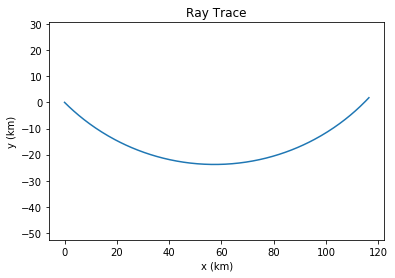

In [13]:
stepper = integrate.odeint(F, q0, t)
data = pd.DataFrame(stepper, columns=['x', 'y', 'θ'])

plt.plot(data.x, data.y)
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.title('Ray Trace')
plt.axis('equal')
plt.show()

We could do this for a number of different initial angles:

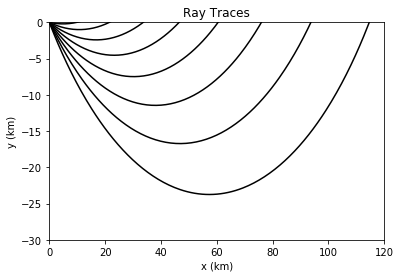

In [14]:
def vary_theta(x0=0, y0=0, θmin = π/4, θmax = π/2):
    for θ0 in np.arange(θmin, θmax, 0.1):
        q0 = [x0, y0, θ0]

        stepper = integrate.odeint(F, q0, t)
        data = pd.DataFrame(stepper, columns=['x', 'y', 'θ'])

        plt.plot(data.x, data.y, 'k-')
    plt.xlabel('x (km)')
    plt.ylabel('y (km)')
    plt.ylim(-30, 0)
    plt.xlim(0, 120)
    plt.title('Ray Traces')
    
vary_theta()

Probably a good idea to show the density/velocity as a background to these traces.

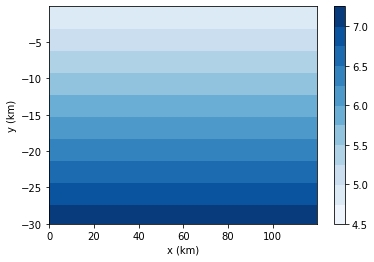

In [15]:
def plot_velocity():
    X, Y = np.mgrid[0:120:0.1, -30:0:0.1]
    V = v(X,Y)
    plt.contourf(X, Y, V, 10, cmap=plt.cm.Blues)
    plt.xlabel('x (km)')
    plt.ylabel('y (km)')
    plt.colorbar()
    
plot_velocity()

Of course we could put these together:

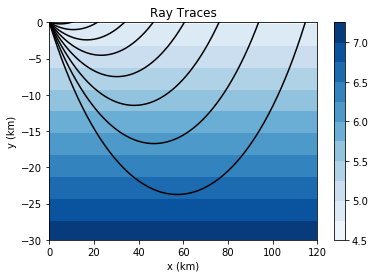

In [16]:
plot_velocity()
vary_theta()

What if there were some variations of rock density?

In [18]:

def ρ_perturbation(x, y):
    r =0
    r += 1*np.exp(-(x-60)**2/ 20 - (y+15)**2/20)
    r += 0.1*np.exp(-(x-20)**2/ 30 - (y+5)**2/20)
    
    return r
    
def ρ(x, y):
    return (2000 - 1500/40*y)/1000 + ρ_perturbation(x, y)


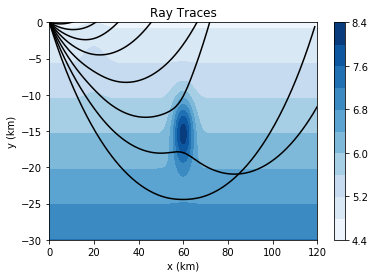

In [20]:
plot_velocity()
vary_theta()

Seismic pulse at depth

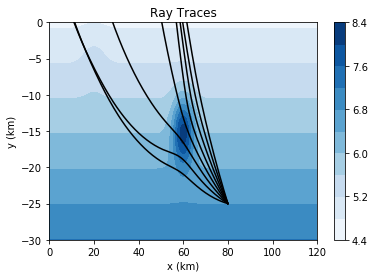

In [21]:
plot_velocity()
vary_theta(x0=80, y0 = -25, θmin = -3*π/4, θmax = -π/2)


## Travel Time Curves and Earthquake Detection




## Background


http://www.iris.edu/hq/inclass/animation/1component_seismogram_building_responds_to_p_s_surface_waves

https://www.iris.edu/hq/inclass/animation/seismic_wave_motions4_waves_animated

http://www.iris.edu/hq/inclass/animation/earthquakes_scattered_across_the_globe_recorded_by_one_station

http://www.iris.edu/hq/inclass/animation/4station_seismograph_network_records_a_single_earthquake

http://www.iris.edu/hq/inclass/video/travel_time_curves_described

http://www.iris.edu/hq/inclass/video/types_of_seismic_wave_paths_through_the_earth


In our Lab this week, we are going to explore the seismic waves produced by the August 24, 2016 earthquake in Italy.

http://www.iris.edu/hq/files/programs/education_and_outreach/retm/tm_160824_italy/160824italy.pdf